# Perkenalan 

## Nama : Dimas Furqon Prawimastoro

# Latar Belakang

Canadasalesdata.csv adalah suatu set data yang berisikan tentang penjualan mobil yang dihitung selama setahun, dari mulai tahun 2019 hingga tahun 2021. Dari data tersebut juga dipisahkan berdasarkan jenis merk mobil yang dipantau penjualannya per bulan. selain itu terdapat juga Kategori untuk jenis merk dari Mobil-mobil tersebut.

Adapun tujuan dari dataset ini adalah untuk melihat trend penjualan dari setiap jenis merk mobil yang bergerak setiap bulannya dalam rentang waktu 3 tahun, sehingga dari data tersebut dapat terlihat produk jenis merk mobil mana kah yang lebih unggul dari sisi penjualan dan dari sisi periode penjualan.

Dari data yang disajikan dapat diperoleh beberapa permasalahan yang akan ditelaah, antara lain : 
1. Analisis Total penjualan : digunakan untuk melihat agregasi total penjual berdasarkan merk
2. Analisis Trend : digunakan untuk melihat penjualan terbanyak maupun penjualan yang paling sedikit berdasarkan periode bulan atau tahun tertentu.
3. Analisis preferensi pengguna: digunakan untuk analisis untuk mengetahui preferensi pengguna terhadap merk mobil berdasarkan total penjualan
4. Analisis preferensi Kategori: digunakan untuk melihat preferensi terhadap kategori mobil
5. Analisis Kategori x Tahun : digunakan untuk melihat prefersi mobil pada tahun tertentu


# Penjelasan Kolom

# 1. Import Library dan Dataset

## 1.1. Import Library

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.2. Import Dataset

In [68]:
data1 = pd.read_csv('Canadasalesdata.csv')

In [69]:
data1

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Category,Year
0,Acura MDX,93,389,782,611,550,501,0,0,0,0,0,0,2926,MLS,2021
1,Audi Q7,210,210,236,303,292,303,0,0,0,0,0,0,1554,MLS,2021
2,Audi Q8,130,130,146,211,203,211,0,0,0,0,0,0,1031,MLS,2021
3,BMW X5,323,323,364,518,498,518,0,0,0,0,0,0,2544,MLS,2021
4,BMW X6,72,72,81,113,108,113,0,0,0,0,0,0,559,MLS,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Subaru Outback,499,621,948,1065,1079,981,1074,845,644,926,1184,1106,10972,MS,2019
232,Toyota 4Runner,605,393,784,762,854,681,824,903,522,690,663,549,8230,MS,2019
233,Toyota Highlander,729,792,1184,1095,1185,1423,1347,1336,1114,1366,1316,924,13811,MS,2019
234,Volkswagen Atlas,530,521,822,925,881,725,761,769,748,933,695,601,8911,MS,2019


# 2. Data Checking

In [71]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Model       236 non-null    object
 1   Jan         236 non-null    int64 
 2   Feb         236 non-null    int64 
 3   Mar         236 non-null    int64 
 4   Apr         236 non-null    int64 
 5   May         236 non-null    int64 
 6   Jun         236 non-null    int64 
 7   Jul         236 non-null    int64 
 8   Aug         236 non-null    int64 
 9   Sep         236 non-null    int64 
 10  Oct         236 non-null    int64 
 11  Nov         236 non-null    int64 
 12  Dec         236 non-null    int64 
 13  Sumofsales  236 non-null    int64 
 14  Category    236 non-null    object
 15  Year        236 non-null    int64 
dtypes: int64(14), object(2)
memory usage: 29.6+ KB


In [72]:
data1.isna().sum()

Model         0
Jan           0
Feb           0
Mar           0
Apr           0
May           0
Jun           0
Jul           0
Aug           0
Sep           0
Oct           0
Nov           0
Dec           0
Sumofsales    0
Category      0
Year          0
dtype: int64

Dapat terlihat bahwa tidak ada kolom yang memiliki 'missing values'

In [74]:
data1["Merek Mobil"]=data1["Model"].str.split().str[0]
data1

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Category,Year,Merek Mobil
0,Acura MDX,93,389,782,611,550,501,0,0,0,0,0,0,2926,MLS,2021,Acura
1,Audi Q7,210,210,236,303,292,303,0,0,0,0,0,0,1554,MLS,2021,Audi
2,Audi Q8,130,130,146,211,203,211,0,0,0,0,0,0,1031,MLS,2021,Audi
3,BMW X5,323,323,364,518,498,518,0,0,0,0,0,0,2544,MLS,2021,BMW
4,BMW X6,72,72,81,113,108,113,0,0,0,0,0,0,559,MLS,2021,BMW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Subaru Outback,499,621,948,1065,1079,981,1074,845,644,926,1184,1106,10972,MS,2019,Subaru
232,Toyota 4Runner,605,393,784,762,854,681,824,903,522,690,663,549,8230,MS,2019,Toyota
233,Toyota Highlander,729,792,1184,1095,1185,1423,1347,1336,1114,1366,1316,924,13811,MS,2019,Toyota
234,Volkswagen Atlas,530,521,822,925,881,725,761,769,748,933,695,601,8911,MS,2019,Volkswagen


In [75]:
merk = data1["Merek Mobil"].unique()
merek = pd.DataFrame({'Merek Mobil':merk})
merek["No"] = pd.DataFrame(np.arange(0,30,1))
merek

,Merek Mobil,No
0,Acura,0
1,Audi,1
2,BMW,2
3,Cadillac,3
4,Genesis,4
5,Infiniti,5
6,Jaguar,6
7,Land,7
8,Lexus,8
9,Lincoln,9


# 3. Analisis Data Eksploratori

## 3.1 Analisis Total penjualan selama Setahun secara Agregat

In [78]:
### membuat baris total
datatotal = data1[['Model','Sumofsales','Category','Year']]

In [79]:
datatotal

,Model,Sumofsales,Category,Year
0,Acura MDX,2926,MLS,2021
1,Audi Q7,1554,MLS,2021
2,Audi Q8,1031,MLS,2021
3,BMW X5,2544,MLS,2021
4,BMW X6,559,MLS,2021
...,...,...,...,...
231,Subaru Outback,10972,MS,2019
232,Toyota 4Runner,8230,MS,2019
233,Toyota Highlander,13811,MS,2019
234,Volkswagen Atlas,8911,MS,2019


In [80]:
datatotal.describe()

,Sumofsales,Year
count,236.000000,236.000000
mean,3680.783898,2019.961864
std,4380.003782,0.795350
min,2.000000,2019.000000
25%,925.750000,2019.000000
50%,2132.000000,2020.000000
75%,4257.250000,2021.000000
max,23185.000000,2021.000000


data 'year'masih terbaca data integer, oleh karena itu perlu di cast agar berubah ke tipe string

In [82]:
data1["Year"] = data1["Year"].astype(str)
data1

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Category,Year,Merek Mobil
0,Acura MDX,93,389,782,611,550,501,0,0,0,0,0,0,2926,MLS,2021,Acura
1,Audi Q7,210,210,236,303,292,303,0,0,0,0,0,0,1554,MLS,2021,Audi
2,Audi Q8,130,130,146,211,203,211,0,0,0,0,0,0,1031,MLS,2021,Audi
3,BMW X5,323,323,364,518,498,518,0,0,0,0,0,0,2544,MLS,2021,BMW
4,BMW X6,72,72,81,113,108,113,0,0,0,0,0,0,559,MLS,2021,BMW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Subaru Outback,499,621,948,1065,1079,981,1074,845,644,926,1184,1106,10972,MS,2019,Subaru
232,Toyota 4Runner,605,393,784,762,854,681,824,903,522,690,663,549,8230,MS,2019,Toyota
233,Toyota Highlander,729,792,1184,1095,1185,1423,1347,1336,1114,1366,1316,924,13811,MS,2019,Toyota
234,Volkswagen Atlas,530,521,822,925,881,725,761,769,748,933,695,601,8911,MS,2019,Volkswagen


In [83]:
datatotal["Year"] = datatotal["Year"].astype(str)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5400\1621098551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatotal["Year"] = datatotal["Year"].astype(str)


In [84]:
datatotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Model       236 non-null    object
 1   Sumofsales  236 non-null    int64 
 2   Category    236 non-null    object
 3   Year        236 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.5+ KB


visualisasi data total penjualan 

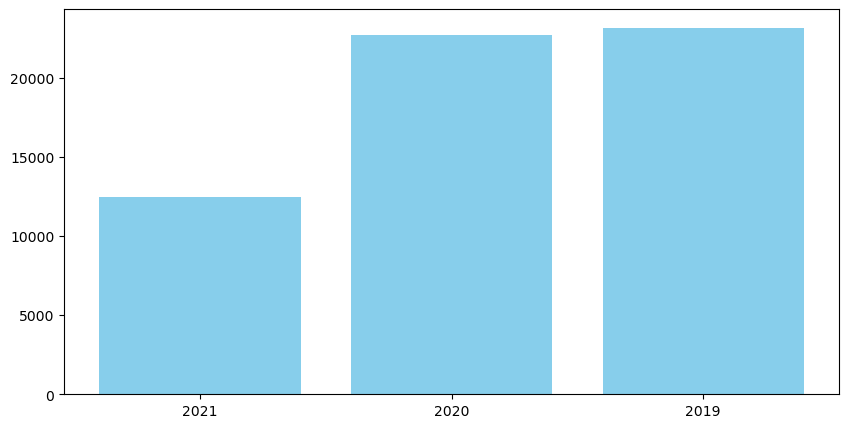

In [86]:
plt.figure(figsize=(10,5))
plt.bar(datatotal["Year"],datatotal["Sumofsales"], label= "Penjualan (unit)", color = 'skyblue')
plt.show()

In [87]:
datatotalasc = datatotal.sort_values(by="Year",ascending=True)
print(datatotalasc)

                          Model  Sumofsales Category  Year
117  Land Rover Discovery Sport        1076      SLS  2019
150       Mercedes0Benz G0Class        1272      LLS  2019
149           Lincoln Navigator        1644      LLS  2019
148                    Lexus LX        1053      LLS  2019
147      Land Rover Range Rover        1732      LLS  2019
..                          ...         ...      ...   ...
131           Lincoln Navigator         642      LLS  2021
130                    Lexus LX         297      LLS  2021
129      Land Rover Range Rover         775      LLS  2021
85                   Volvo XC60        1226      SLS  2021
0                     Acura MDX        2926      MLS  2021

[236 rows x 4 columns]


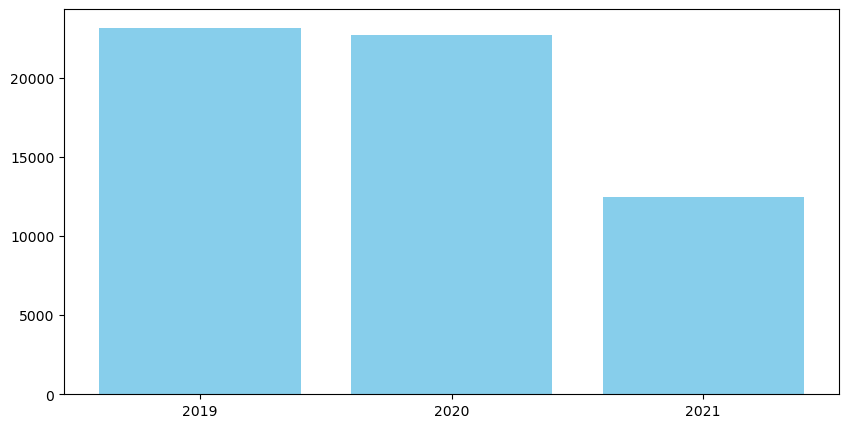

In [88]:
plt.figure(figsize=(10,5))
plt.bar(datatotalasc["Year"],datatotalasc["Sumofsales"], label= "Penjualan (unit)", color = 'skyblue')
plt.show()

Dapat dilihat bahwa dari data tersebut penjualan selama 3 tahun secara agregat mengalami penurunan, dan penurunan yang signifikan ada pada tahun 2020 ke 2021

## 3.2 Analisis per Tahun

### Analisis Tahun 2019

In [92]:
data2019 = data1[data1["Year"] == '2019']
data2019

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Category,Year,Merek Mobil
46,Alfa Romeo Stelvio,25,17,40,46,38,38,32,36,72,31,26,57,458,MLS,2019,Alfa
47,Audi eTron,0,0,0,0,0,113,98,42,71,58,75,33,490,MLS,2019,Audi
48,Audi Q3,77,0,0,0,0,0,371,730,457,668,929,502,3734,MLS,2019,Audi
49,Audi Q5,626,603,1025,1349,1346,833,781,921,1070,859,1009,433,10855,MLS,2019,Audi
50,BMW X1,183,591,509,525,244,307,151,310,477,456,425,242,4420,MLS,2019,BMW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Subaru Outback,499,621,948,1065,1079,981,1074,845,644,926,1184,1106,10972,MS,2019,Subaru
232,Toyota 4Runner,605,393,784,762,854,681,824,903,522,690,663,549,8230,MS,2019,Toyota
233,Toyota Highlander,729,792,1184,1095,1185,1423,1347,1336,1114,1366,1316,924,13811,MS,2019,Toyota
234,Volkswagen Atlas,530,521,822,925,881,725,761,769,748,933,695,601,8911,MS,2019,Volkswagen


In [111]:
data19total = data2019.groupby("Merek Mobil").agg(
    total_penjualan = ("Sumofsales","sum"),
    total_jan = ("Jan","sum"),
    total_feb = ("Feb","sum"),
    total_mar = ("Mar","sum"),
    total_apr = ("Apr","sum"),
    total_may = ("May","sum"),
    total_jun = ("Jun","sum"),
    total_jul = ("Jul","sum"),
    total_aug = ("Aug","sum"),
    total_sep = ("Sep","sum"),
    total_oct = ("Oct","sum"),
    total_nov = ("Nov","sum"),
    total_dec = ("Dec","sum"),

    ).reindex(['Acura', 'Audi', 'BMW', 'Cadillac', 'Genesis', 'Infiniti',
       'Jaguar', 'Land', 'Lexus', 'Lincoln', 'Maserati', 'Mercedes0Benz',
       'Porsche', 'Tesla', 'Volvo', 'Alfa', 'Toyota', 'Chevrolet', 'Ford',
       'GMC', 'Jeep', 'Nissan', 'Kia', 'Mazda', 'Subaru', 'Volkswagen',
       'Buick', 'Dodge', 'Honda', 'Hyundai'])

In [113]:
data19gabung = pd.merge(data19total,merek, on='Merek Mobil', how = 'inner')
data19gabung

,Merek Mobil,total_penjualan,total_jan,total_feb,total_mar,total_apr,total_may,total_jun,total_jul,total_aug,total_sep,total_oct,total_nov,total_dec,No
0,Acura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Audi,30158.0,1406.0,1206.0,2050.0,2698.0,2692.0,1892.0,2500.0,3386.0,3196.0,3170.0,4026.0,1936.0,1
2,BMW,13226.0,492.0,1588.0,1488.0,1607.0,1039.0,1027.0,623.0,880.0,1361.0,1131.0,1214.0,776.0,2
3,Cadillac,9549.0,637.0,781.0,895.0,842.0,1015.0,1080.0,860.0,1153.0,491.0,596.0,609.0,590.0,3
4,Genesis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
5,Infiniti,8151.0,447.0,474.0,920.0,687.0,693.0,647.0,617.0,689.0,790.0,761.0,799.0,627.0,5
6,Jaguar,834.0,76.0,6.0,100.0,176.0,104.0,40.0,54.0,54.0,86.0,48.0,56.0,34.0,6
7,Land,7460.0,325.0,351.0,897.0,616.0,627.0,673.0,465.0,604.0,664.0,697.0,744.0,797.0,7
8,Lexus,21671.0,1527.0,1397.0,1922.0,2315.0,2013.0,1708.0,1573.0,1894.0,2168.0,2054.0,1586.0,1514.0,8
9,Lincoln,6658.0,378.0,374.0,636.0,556.0,634.0,611.0,595.0,549.0,578.0,285.0,226.0,1236.0,9


In [115]:
data19gabung = data19gabung.sort_values(by = "Merek Mobil", ascending = True)
data19gabung

,Merek Mobil,total_penjualan,total_jan,total_feb,total_mar,total_apr,total_may,total_jun,total_jul,total_aug,total_sep,total_oct,total_nov,total_dec,No
0,Acura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
15,Alfa,916.0,50.0,34.0,80.0,92.0,76.0,76.0,64.0,72.0,144.0,62.0,52.0,114.0,15
1,Audi,30158.0,1406.0,1206.0,2050.0,2698.0,2692.0,1892.0,2500.0,3386.0,3196.0,3170.0,4026.0,1936.0,1
2,BMW,13226.0,492.0,1588.0,1488.0,1607.0,1039.0,1027.0,623.0,880.0,1361.0,1131.0,1214.0,776.0,2
26,Buick,2934.0,174.0,199.0,300.0,312.0,347.0,262.0,303.0,317.0,183.0,199.0,169.0,169.0,26
3,Cadillac,9549.0,637.0,781.0,895.0,842.0,1015.0,1080.0,860.0,1153.0,491.0,596.0,609.0,590.0,3
17,Chevrolet,26678.0,975.0,1577.0,2498.0,2652.0,3968.0,2723.0,3617.0,3875.0,1538.0,1441.0,1345.0,469.0,17
27,Dodge,9620.0,700.0,958.0,957.0,1754.0,531.0,677.0,869.0,996.0,640.0,687.0,584.0,267.0,27
18,Ford,36505.0,2074.0,2292.0,3628.0,4139.0,4495.0,3688.0,2776.0,3054.0,2703.0,2414.0,2693.0,2549.0,18
19,GMC,9516.0,544.0,621.0,935.0,974.0,1084.0,818.0,945.0,988.0,698.0,766.0,652.0,491.0,19


### Visualisasi data penjualan tahun 2019

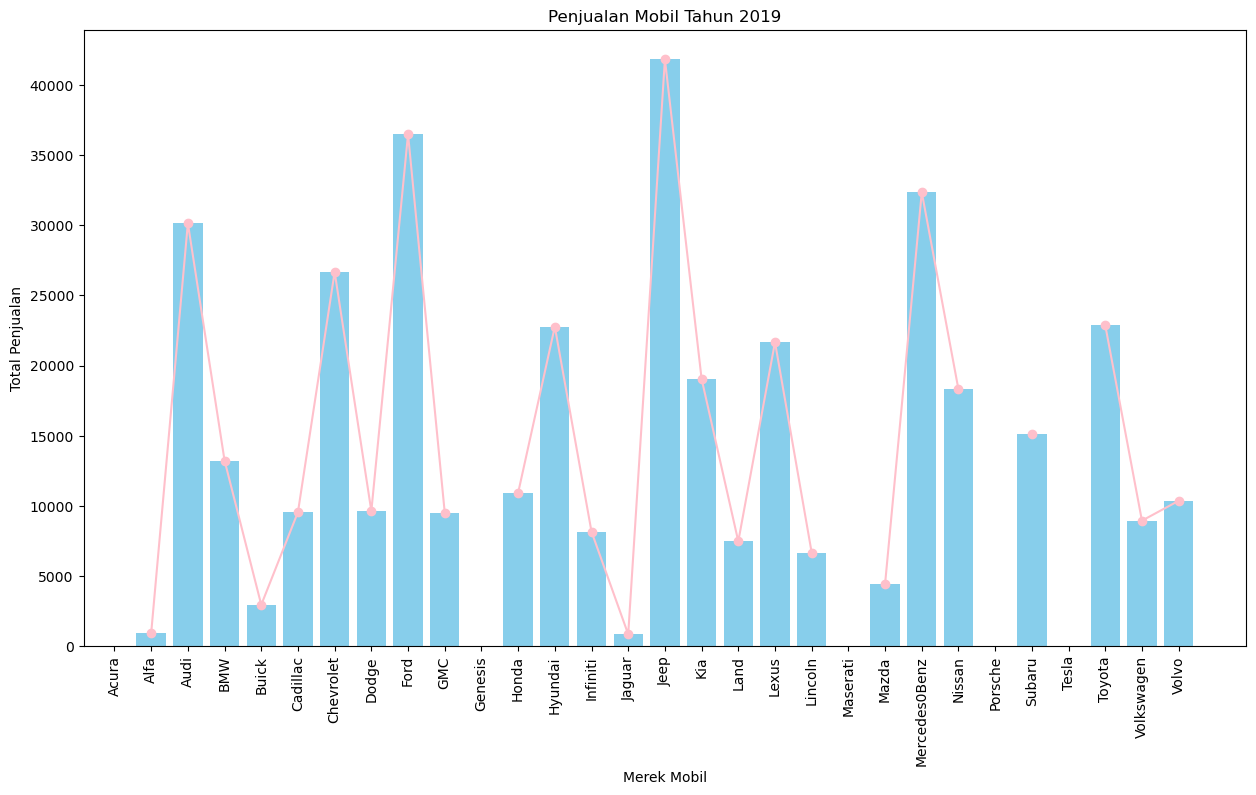

In [118]:
plt.figure(figsize=(15,8))
Ax = data19gabung["Merek Mobil"]
Ay = data19gabung["total_penjualan"]
plt.bar(Ax,Ay,label="Total Penjualan Tahun 2019",color='skyblue')
plt.plot(Ax,Ay,marker = 'o', label="Total Penjualan Tahun 2019",color='pink')
plt.title("Penjualan Mobil Tahun 2019")
plt.xlabel("Merek Mobil")
plt.ylabel("Total Penjualan")
plt.xticks(rotation = 90)
plt.show()

melihat jumlah secara agregat perbulan : 

In [121]:
data19sum = data19gabung[["total_jan","total_feb","total_mar","total_apr","total_may","total_jun","total_jul","total_aug","total_sep","total_oct","total_nov","total_dec"]].sum()
data19 = data19sum.transpose()
data19

total_jan    21492.0
total_feb    25766.0
total_mar    37115.0
total_apr    38932.0
total_may    38950.0
total_jun    35206.0
total_jul    34897.0
total_aug    36929.0
total_sep    31998.0
total_oct    31519.0
total_nov    31846.0
total_dec    26175.0
dtype: float64

In [123]:
np.shape(data19)

(12,)

In [125]:
df19 = pd.DataFrame(data19, columns=['Penjualan'])
df19

,Penjualan
total_jan,21492.0
total_feb,25766.0
total_mar,37115.0
total_apr,38932.0
total_may,38950.0
total_jun,35206.0
total_jul,34897.0
total_aug,36929.0
total_sep,31998.0
total_oct,31519.0


In [127]:
df19["Total Bulan"] = df19.index
df19

,Penjualan,Total Bulan
total_jan,21492.0,total_jan
total_feb,25766.0,total_feb
total_mar,37115.0,total_mar
total_apr,38932.0,total_apr
total_may,38950.0,total_may
total_jun,35206.0,total_jun
total_jul,34897.0,total_jul
total_aug,36929.0,total_aug
total_sep,31998.0,total_sep
total_oct,31519.0,total_oct


In [129]:
df19["Unit"] = df19["Penjualan"]
df19

,Penjualan,Total Bulan,Unit
total_jan,21492.0,total_jan,21492.0
total_feb,25766.0,total_feb,25766.0
total_mar,37115.0,total_mar,37115.0
total_apr,38932.0,total_apr,38932.0
total_may,38950.0,total_may,38950.0
total_jun,35206.0,total_jun,35206.0
total_jul,34897.0,total_jul,34897.0
total_aug,36929.0,total_aug,36929.0
total_sep,31998.0,total_sep,31998.0
total_oct,31519.0,total_oct,31519.0


In [131]:
df19.describe()

,Penjualan,Unit
count,12.000000,12.000000
mean,32568.750000,32568.750000
std,5600.886636,5600.886636
min,21492.000000,21492.000000
25%,30183.000000,30183.000000
50%,33447.500000,33447.500000
75%,36975.500000,36975.500000
max,38950.000000,38950.000000


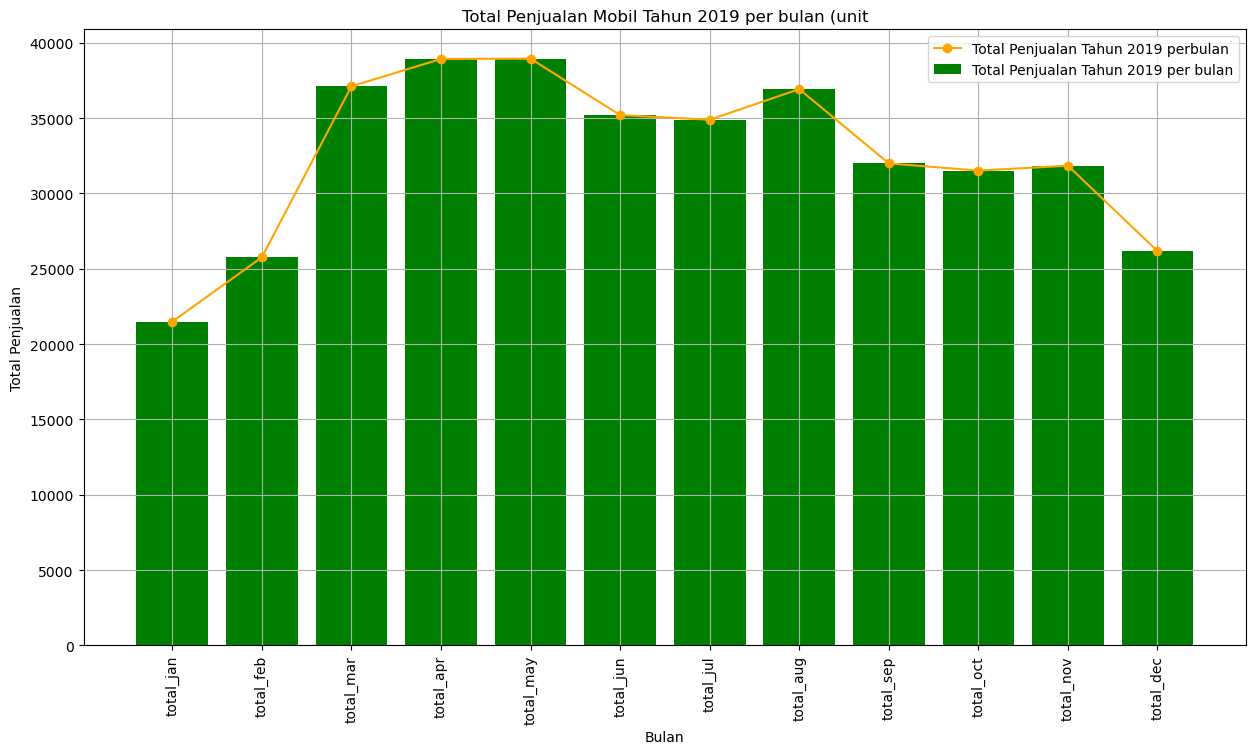

In [133]:
plt.figure(figsize=(15,8))
Bx = df19["Total Bulan"]
By = df19["Unit"]
plt.bar(Bx,By,label="Total Penjualan Tahun 2019 per bulan",color='green')
plt.plot(Bx,By,marker = 'o', label="Total Penjualan Tahun 2019 perbulan",color='orange')
plt.title("Total Penjualan Mobil Tahun 2019 per bulan (unit")
plt.xlabel("Bulan")
plt.ylabel("Total Penjualan")
plt.xticks(rotation = 90)
plt.legend()
plt.grid()
plt.show()

### Analisis Tahun 2020

In [137]:
data2020 = data1[data1["Year"] == '2020']
data2020

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Category,Year,Merek Mobil
23,Acura MDX,194,196,94,54,224,420,353,420,437,429,255,845,3921,MLS,2020,Acura
24,Audi Q7,142,183,111,81,181,190,266,236,256,203,167,232,2248,MLS,2020,Audi
25,Audi Q8,84,108,66,43,96,100,122,109,118,161,132,184,1323,MLS,2020,Audi
26,BMW X5,296,383,232,215,478,501,456,405,439,466,382,532,4785,MLS,2020,BMW
27,BMW X6,76,98,60,41,92,96,106,94,102,89,73,101,1028,MLS,2020,BMW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Subaru Outback,679,718,510,259,570,833,1232,1072,1220,1168,1095,3200,12556,MS,2020,Subaru
207,Toyota 4Runner,513,542,347,323,656,357,630,497,554,1470,1160,772,7821,MS,2020,Toyota
208,Toyota Highlander,1129,1067,645,508,777,724,1362,1555,1565,2958,2559,1608,16457,MS,2020,Toyota
209,Volkswagen Atlas,511,661,400,316,701,736,1103,981,1062,978,803,1118,9370,MS,2020,Volkswagen


In [139]:
data20total = data2020.groupby("Merek Mobil").agg(
    total_penjualan = ("Sumofsales","sum"),
    total_jan = ("Jan","sum"),
    total_feb = ("Feb","sum"),
    total_mar = ("Mar","sum"),
    total_apr = ("Apr","sum"),
    total_may = ("May","sum"),
    total_jun = ("Jun","sum"),
    total_jul = ("Jul","sum"),
    total_aug = ("Aug","sum"),
    total_sep = ("Sep","sum"),
    total_oct = ("Oct","sum"),
    total_nov = ("Nov","sum"),
    total_dec = ("Dec","sum"),

    ).reindex(['Acura', 'Audi', 'BMW', 'Cadillac', 'Genesis', 'Infiniti',
       'Jaguar', 'Land', 'Lexus', 'Lincoln', 'Maserati', 'Mercedes0Benz',
       'Porsche', 'Tesla', 'Volvo', 'Alfa', 'Toyota', 'Chevrolet', 'Ford',
       'GMC', 'Jeep', 'Nissan', 'Kia', 'Mazda', 'Subaru', 'Volkswagen',
       'Buick', 'Dodge', 'Honda', 'Hyundai'])

In [141]:
data20gabung = pd.merge(data20total,merek, on='Merek Mobil', how = 'inner')
data20gabung

,Merek Mobil,total_penjualan,total_jan,total_feb,total_mar,total_apr,total_may,total_jun,total_jul,total_aug,total_sep,total_oct,total_nov,total_dec,No
0,Acura,3921,194,196,94,54,224,420,353,420,437,429,255,845,0
1,Audi,18116,1129,1461,885,670,1490,1563,1902,1691,1833,1853,1522,2117,1
2,BMW,10332,729,942,571,398,828,926,1051,933,1012,993,815,1134,2
3,Cadillac,10961,596,772,468,407,903,948,1307,1162,1259,1059,870,1210,3
4,Genesis,296,0,0,0,0,0,0,0,0,0,0,20,276,4
5,Infiniti,4474,394,452,194,108,240,253,537,477,516,440,361,502,5
6,Jaguar,1711,215,279,169,59,132,138,117,103,113,130,107,149,6
7,Land,8284,733,950,575,280,620,653,715,636,688,821,675,938,7
8,Lexus,20482,1430,1416,1008,505,1184,982,1906,1621,2018,3622,2887,1903,8
9,Lincoln,6925,441,570,346,244,542,569,855,761,824,598,491,684,9


In [143]:
data20gabung = data20gabung.sort_values(by = "Merek Mobil", ascending = True)
data20gabung

,Merek Mobil,total_penjualan,total_jan,total_feb,total_mar,total_apr,total_may,total_jun,total_jul,total_aug,total_sep,total_oct,total_nov,total_dec,No
0,Acura,3921,194,196,94,54,224,420,353,420,437,429,255,845,0
15,Alfa,487,23,30,18,16,36,37,62,55,59,51,42,58,15
1,Audi,18116,1129,1461,885,670,1490,1563,1902,1691,1833,1853,1522,2117,1
2,BMW,10332,729,942,571,398,828,926,1051,933,1012,993,815,1134,2
26,Buick,1773,159,206,125,57,126,132,182,161,175,152,125,173,26
3,Cadillac,10961,596,772,468,407,903,948,1307,1162,1259,1059,870,1210,3
17,Chevrolet,15337,959,1241,752,551,1223,1284,1718,1526,1653,1495,1228,1707,17
27,Dodge,5667,654,847,513,65,144,151,283,252,273,838,689,958,27
18,Ford,33223,2382,3085,1868,1184,2633,2765,3850,3423,3707,2809,2307,3210,18
19,GMC,7332,678,878,532,214,475,498,709,630,683,686,564,785,19


### Visualisasi data penjualan tahun 2020

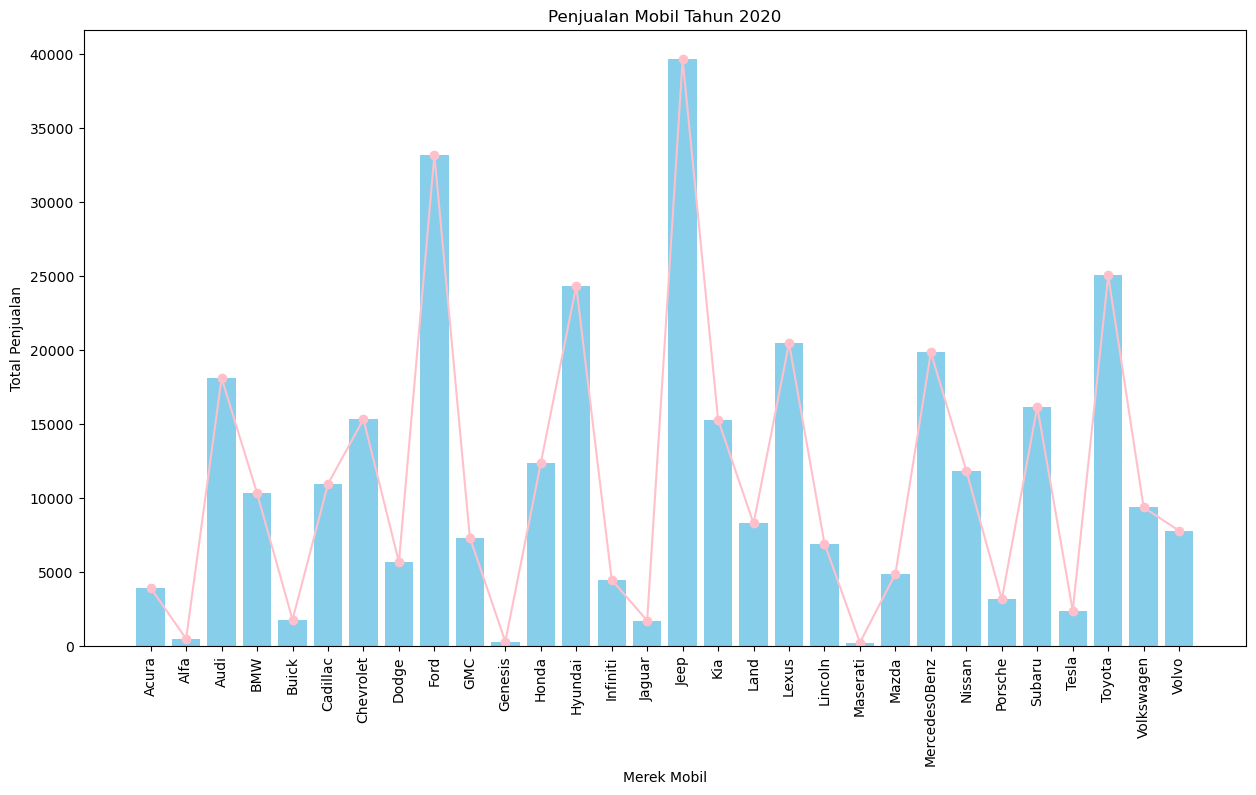

In [146]:
plt.figure(figsize=(15,8))
Cx = data20gabung["Merek Mobil"]
Cy = data20gabung["total_penjualan"]
plt.bar(Cx,Cy,label="Total Penjualan Tahun 2020",color='skyblue')
plt.plot(Cx,Cy,marker = 'o', label="Total Penjualan Tahun 2020",color='pink')
plt.title("Penjualan Mobil Tahun 2020")
plt.xlabel("Merek Mobil")
plt.ylabel("Total Penjualan")
plt.xticks(rotation = 90)
plt.show()

melihat jumlah secara agregat perbulan : 

In [149]:
data20sum = data20gabung[["total_jan","total_feb","total_mar","total_apr","total_may","total_jun","total_jul","total_aug","total_sep","total_oct","total_nov","total_dec"]].sum()
data20 = data20sum.transpose()
data20

total_jan    22905
total_feb    30059
total_mar    16923
total_apr    10313
total_may    23585
total_jun    26691
total_jul    35221
total_aug    31984
total_sep    34450
total_oct    36110
total_nov    29361
total_dec    44134
dtype: int64

In [151]:
df20 = pd.DataFrame(data20, columns=['Penjualan'])
df20

,Penjualan
total_jan,22905
total_feb,30059
total_mar,16923
total_apr,10313
total_may,23585
total_jun,26691
total_jul,35221
total_aug,31984
total_sep,34450
total_oct,36110


In [153]:
df20["Total Bulan"] = df20.index
df20

,Penjualan,Total Bulan
total_jan,22905,total_jan
total_feb,30059,total_feb
total_mar,16923,total_mar
total_apr,10313,total_apr
total_may,23585,total_may
total_jun,26691,total_jun
total_jul,35221,total_jul
total_aug,31984,total_aug
total_sep,34450,total_sep
total_oct,36110,total_oct


In [155]:
df20["Unit"] = df20["Penjualan"]
df20

,Penjualan,Total Bulan,Unit
total_jan,22905,total_jan,22905
total_feb,30059,total_feb,30059
total_mar,16923,total_mar,16923
total_apr,10313,total_apr,10313
total_may,23585,total_may,23585
total_jun,26691,total_jun,26691
total_jul,35221,total_jul,35221
total_aug,31984,total_aug,31984
total_sep,34450,total_sep,34450
total_oct,36110,total_oct,36110


In [157]:
df20.describe()

,Penjualan,Unit
count,12.000000,12.000000
mean,28478.000000,28478.000000
std,9153.937434,9153.937434
min,10313.000000,10313.000000
25%,23415.000000,23415.000000
50%,29710.000000,29710.000000
75%,34642.750000,34642.750000
max,44134.000000,44134.000000


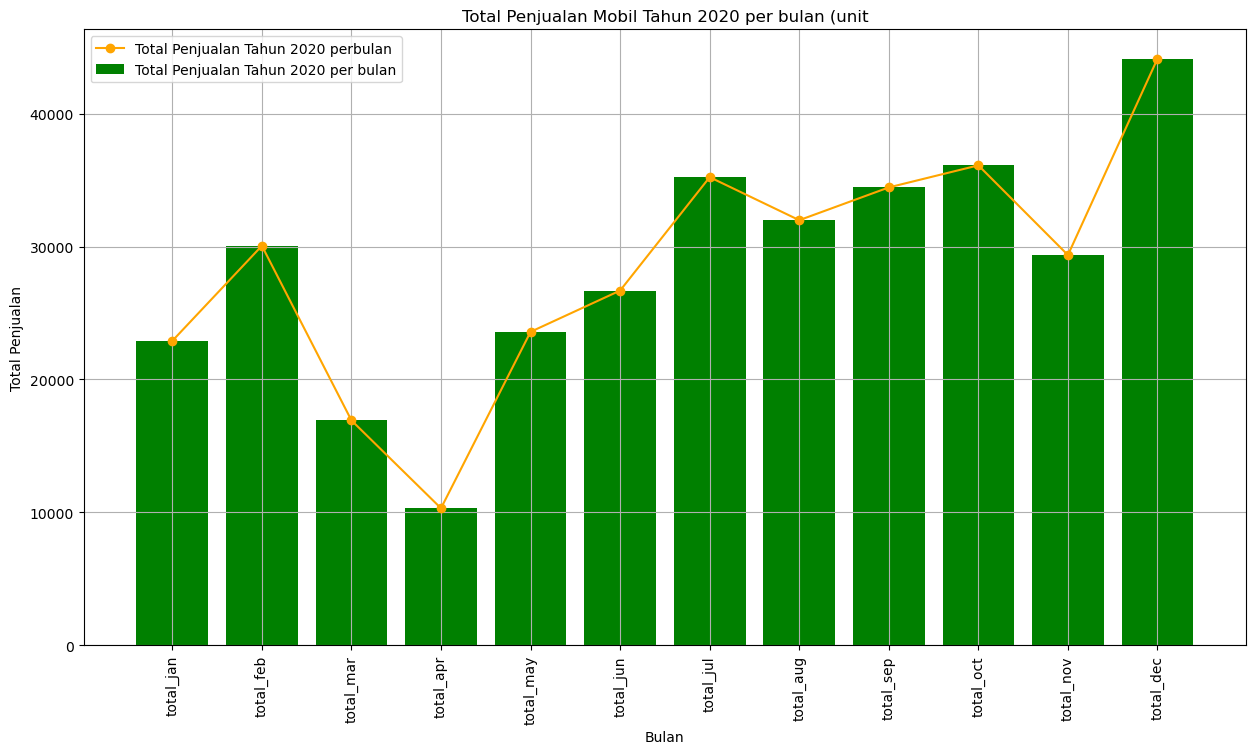

In [159]:
plt.figure(figsize=(15,8))
Dx = df20["Total Bulan"]
Dy = df20["Unit"]
plt.bar(Dx,Dy,label="Total Penjualan Tahun 2020 per bulan",color='green')
plt.plot(Dx,Dy,marker = 'o', label="Total Penjualan Tahun 2020 perbulan",color='orange')
plt.title("Total Penjualan Mobil Tahun 2020 per bulan (unit")
plt.xlabel("Bulan")
plt.ylabel("Total Penjualan")
plt.xticks(rotation = 90)
plt.legend()
plt.grid()
plt.show()

### Analisis Tahun 2021

In [162]:
data2021 = data1[data1["Year"] == '2021']
data2021

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Category,Year,Merek Mobil
0,Acura MDX,93,389,782,611,550,501,0,0,0,0,0,0,2926,MLS,2021,Acura
1,Audi Q7,210,210,236,303,292,303,0,0,0,0,0,0,1554,MLS,2021,Audi
2,Audi Q8,130,130,146,211,203,211,0,0,0,0,0,0,1031,MLS,2021,Audi
3,BMW X5,323,323,364,518,498,518,0,0,0,0,0,0,2544,MLS,2021,BMW
4,BMW X6,72,72,81,113,108,113,0,0,0,0,0,0,559,MLS,2021,BMW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Subaru Ascent,147,231,342,306,306,394,305,0,0,0,0,0,2031,MS,2021,Subaru
180,Subaru Outback,544,677,1134,1122,818,709,988,0,0,0,0,0,5992,MS,2021,Subaru
181,Toyota 4Runner,668,748,738,643,601,710,788,0,0,0,0,0,4896,MS,2021,Toyota
182,Toyota Highlander,1029,1328,2013,1827,1917,2289,2070,0,0,0,0,0,12473,MS,2021,Toyota


In [164]:
data21total = data2021.groupby("Merek Mobil").agg(
    total_penjualan = ("Sumofsales","sum"),
    total_jan = ("Jan","sum"),
    total_feb = ("Feb","sum"),
    total_mar = ("Mar","sum"),
    total_apr = ("Apr","sum"),
    total_may = ("May","sum"),
    total_jun = ("Jun","sum"),
    total_jul = ("Jul","sum"),
    total_aug = ("Aug","sum"),
    total_sep = ("Sep","sum"),
    total_oct = ("Oct","sum"),
    total_nov = ("Nov","sum"),
    total_dec = ("Dec","sum"),

    ).reindex(['Acura', 'Audi', 'BMW', 'Cadillac', 'Genesis', 'Infiniti',
       'Jaguar', 'Land', 'Lexus', 'Lincoln', 'Maserati', 'Mercedes0Benz',
       'Porsche', 'Tesla', 'Volvo', 'Alfa', 'Toyota', 'Chevrolet', 'Ford',
       'GMC', 'Jeep', 'Nissan', 'Kia', 'Mazda', 'Subaru', 'Volkswagen',
       'Buick', 'Dodge', 'Honda', 'Hyundai'])

In [166]:
data21gabung = pd.merge(data21total,merek, on='Merek Mobil', how = 'inner')
data21gabung

,Merek Mobil,total_penjualan,total_jan,total_feb,total_mar,total_apr,total_may,total_jun,total_jul,total_aug,total_sep,total_oct,total_nov,total_dec,No
0,Acura,2926.0,93.0,389.0,782.0,611.0,550.0,501.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Audi,12655.0,1561.0,1561.0,1756.0,2626.0,2525.0,2626.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,BMW,5736.0,703.0,703.0,792.0,1195.0,1148.0,1195.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,Cadillac,7357.0,1040.0,1040.0,1170.0,1387.0,1333.0,1387.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,Genesis,963.0,108.0,106.0,160.0,154.0,146.0,168.0,121.0,0.0,0.0,0.0,0.0,0.0,4
5,Infiniti,2433.0,367.0,367.0,413.0,434.0,418.0,434.0,0.0,0.0,0.0,0.0,0.0,0.0,5
6,Jaguar,988.0,131.0,131.0,148.0,195.0,188.0,195.0,0.0,0.0,0.0,0.0,0.0,0.0,6
7,Land,5372.0,951.0,951.0,1069.0,811.0,779.0,811.0,0.0,0.0,0.0,0.0,0.0,0.0,7
8,Lexus,12127.0,984.0,1155.0,1814.0,2160.0,1825.0,2059.0,2130.0,0.0,0.0,0.0,0.0,0.0,8
9,Lincoln,3590.0,451.0,451.0,508.0,736.0,708.0,736.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [168]:
data21gabung = data21gabung.sort_values(by = "Merek Mobil", ascending = True)
data21gabung

,Merek Mobil,total_penjualan,total_jan,total_feb,total_mar,total_apr,total_may,total_jun,total_jul,total_aug,total_sep,total_oct,total_nov,total_dec,No
0,Acura,2926.0,93.0,389.0,782.0,611.0,550.0,501.0,0.0,0.0,0.0,0.0,0.0,0.0,0
15,Alfa,307.0,42.0,42.0,48.0,59.0,57.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,15
1,Audi,12655.0,1561.0,1561.0,1756.0,2626.0,2525.0,2626.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,BMW,5736.0,703.0,703.0,792.0,1195.0,1148.0,1195.0,0.0,0.0,0.0,0.0,0.0,0.0,2
26,Buick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
3,Cadillac,7357.0,1040.0,1040.0,1170.0,1387.0,1333.0,1387.0,0.0,0.0,0.0,0.0,0.0,0.0,3
17,Chevrolet,3516.0,539.0,539.0,607.0,618.0,595.0,618.0,0.0,0.0,0.0,0.0,0.0,0.0,17
27,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
18,Ford,2605.0,336.0,336.0,378.0,525.0,505.0,525.0,0.0,0.0,0.0,0.0,0.0,0.0,18
19,GMC,3874.0,530.0,530.0,596.0,749.0,720.0,749.0,0.0,0.0,0.0,0.0,0.0,0.0,19


### Visualisasi data penjualan tahun 2021

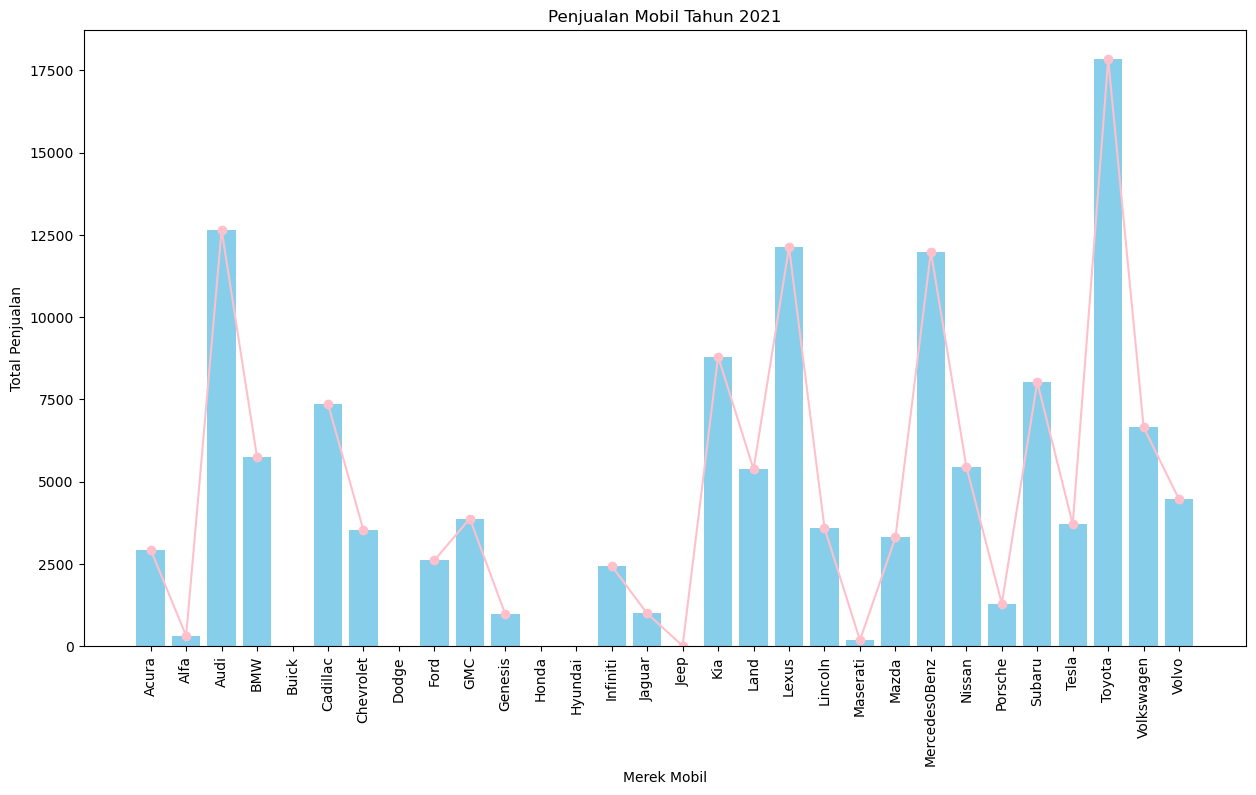

In [171]:
plt.figure(figsize=(15,8))
Ex = data21gabung["Merek Mobil"]
Ey = data21gabung["total_penjualan"]
plt.bar(Ex,Ey,label="Total Penjualan Tahun 2021",color='skyblue')
plt.plot(Ex,Ey,marker = 'o', label="Total Penjualan Tahun 2021",color='pink')
plt.title("Penjualan Mobil Tahun 2021")
plt.xlabel("Merek Mobil")
plt.ylabel("Total Penjualan")
plt.xticks(rotation = 90)
plt.show()

melihat jumlah secara agregat perbulan : 

In [174]:
data21sum = data21gabung[["total_jan","total_feb","total_mar","total_apr","total_may","total_jun","total_jul","total_aug","total_sep","total_oct","total_nov","total_dec"]].sum()
data21 = data21sum.transpose()
data21

total_jan    16258.0
total_feb    17665.0
total_mar    22115.0
total_apr    24625.0
total_may    23163.0
total_jun    24215.0
total_jul     8063.0
total_aug        0.0
total_sep        0.0
total_oct        0.0
total_nov        0.0
total_dec        0.0
dtype: float64

In [176]:
df21 = pd.DataFrame(data21, columns=['Penjualan'])
df21

,Penjualan
total_jan,16258.0
total_feb,17665.0
total_mar,22115.0
total_apr,24625.0
total_may,23163.0
total_jun,24215.0
total_jul,8063.0
total_aug,0.0
total_sep,0.0
total_oct,0.0


In [178]:
df21["Total Bulan"] = df21.index
df21

,Penjualan,Total Bulan
total_jan,16258.0,total_jan
total_feb,17665.0,total_feb
total_mar,22115.0,total_mar
total_apr,24625.0,total_apr
total_may,23163.0,total_may
total_jun,24215.0,total_jun
total_jul,8063.0,total_jul
total_aug,0.0,total_aug
total_sep,0.0,total_sep
total_oct,0.0,total_oct


In [180]:
df21["Unit"] = df21["Penjualan"]
df21

,Penjualan,Total Bulan,Unit
total_jan,16258.0,total_jan,16258.0
total_feb,17665.0,total_feb,17665.0
total_mar,22115.0,total_mar,22115.0
total_apr,24625.0,total_apr,24625.0
total_may,23163.0,total_may,23163.0
total_jun,24215.0,total_jun,24215.0
total_jul,8063.0,total_jul,8063.0
total_aug,0.0,total_aug,0.0
total_sep,0.0,total_sep,0.0
total_oct,0.0,total_oct,0.0


In [182]:
df21.describe()

,Penjualan,Unit
count,12.000000,12.000000
mean,11342.000000,11342.000000
std,10938.047998,10938.047998
min,0.000000,0.000000
25%,0.000000,0.000000
50%,12160.500000,12160.500000
75%,22377.000000,22377.000000
max,24625.000000,24625.000000


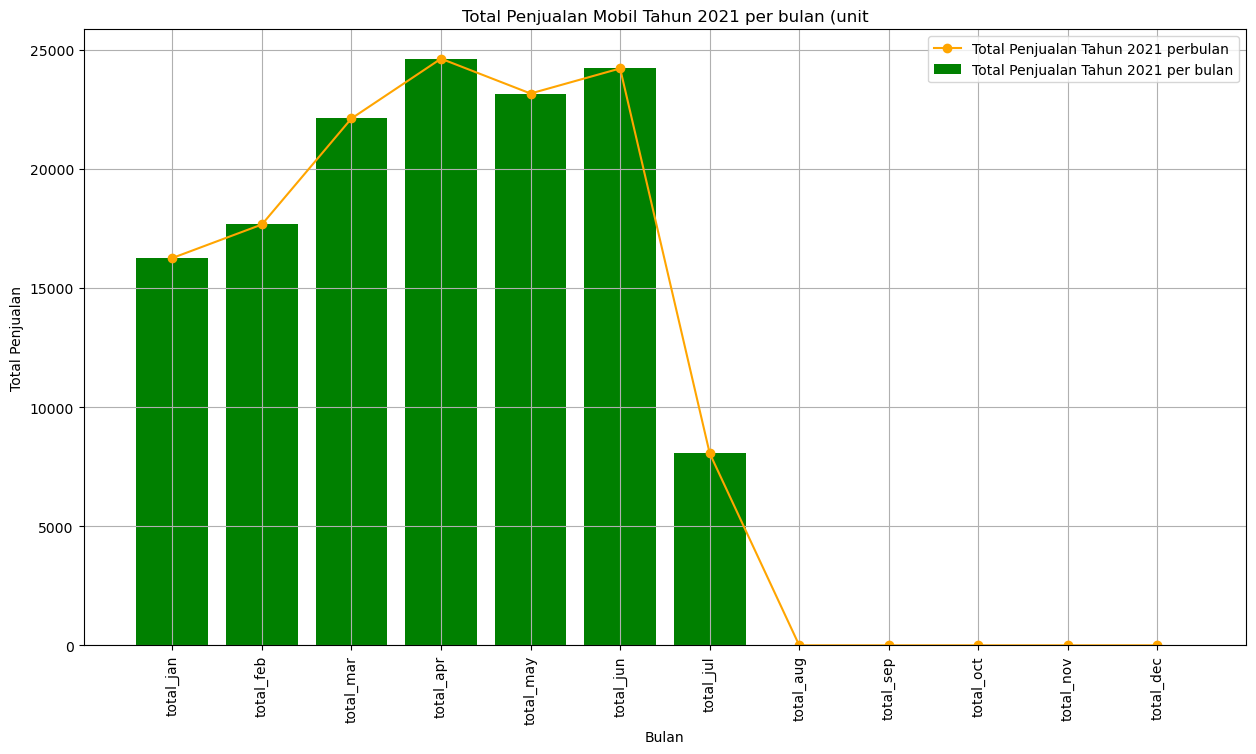

In [184]:
plt.figure(figsize=(15,8))
Fx = df21["Total Bulan"]
Fy = df21["Unit"]
plt.bar(Fx,Fy,label="Total Penjualan Tahun 2021 per bulan",color='green')
plt.plot(Fx,Fy,marker = 'o', label="Total Penjualan Tahun 2021 perbulan",color='orange')
plt.title("Total Penjualan Mobil Tahun 2021 per bulan (unit")
plt.xlabel("Bulan")
plt.ylabel("Total Penjualan")
plt.xticks(rotation = 90)
plt.legend()
plt.grid()
plt.show()

## 3.3 Analisis Preferensi Kendaraan berdasarkan Merek Mobil

Selanjutnya pada tahapan ini kita akan melihat bagaimana kecendrungan preferensi pelanggan berdasarkan merek mobil yang di beli

In [202]:
# Persiapan dataset
dfgabung1 = pd.merge(df19, df20, on='Total Bulan')
dfgabungan = pd.merge(dfgabung1, df21, on='Total Bulan')
dfgabungan

,Penjualan_x,Total Bulan,Unit_x,Penjualan_y,Unit_y,Penjualan,Unit
0,21492.0,total_jan,21492.0,22905,22905,16258.0,16258.0
1,25766.0,total_feb,25766.0,30059,30059,17665.0,17665.0
2,37115.0,total_mar,37115.0,16923,16923,22115.0,22115.0
3,38932.0,total_apr,38932.0,10313,10313,24625.0,24625.0
4,38950.0,total_may,38950.0,23585,23585,23163.0,23163.0
5,35206.0,total_jun,35206.0,26691,26691,24215.0,24215.0
6,34897.0,total_jul,34897.0,35221,35221,8063.0,8063.0
7,36929.0,total_aug,36929.0,31984,31984,0.0,0.0
8,31998.0,total_sep,31998.0,34450,34450,0.0,0.0
9,31519.0,total_oct,31519.0,36110,36110,0.0,0.0


In [204]:
dftotal = dfgabungan[["Total Bulan","Unit_x","Unit_y","Unit"]]
dftotal

,Total Bulan,Unit_x,Unit_y,Unit
0,total_jan,21492.0,22905,16258.0
1,total_feb,25766.0,30059,17665.0
2,total_mar,37115.0,16923,22115.0
3,total_apr,38932.0,10313,24625.0
4,total_may,38950.0,23585,23163.0
5,total_jun,35206.0,26691,24215.0
6,total_jul,34897.0,35221,8063.0
7,total_aug,36929.0,31984,0.0
8,total_sep,31998.0,34450,0.0
9,total_oct,31519.0,36110,0.0


In [210]:
dftotal.rename(columns={'Unit_x':'Unit 2019','Unit_y':'Unit 2020','Unit':'Unit 2021'}, inplace=True)
dftotal

C:\Users\ACER\AppData\Local\Temp\ipykernel_5400\109389966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftotal.rename(columns={'Unit_x':'Unit 2019','Unit_y':'Unit 2020','Unit':'Unit 2021'}, inplace=True)


,Total Bulan,Unit 2019,Unit 2020,Unit 2021
0,total_jan,21492.0,22905,16258.0
1,total_feb,25766.0,30059,17665.0
2,total_mar,37115.0,16923,22115.0
3,total_apr,38932.0,10313,24625.0
4,total_may,38950.0,23585,23163.0
5,total_jun,35206.0,26691,24215.0
6,total_jul,34897.0,35221,8063.0
7,total_aug,36929.0,31984,0.0
8,total_sep,31998.0,34450,0.0
9,total_oct,31519.0,36110,0.0


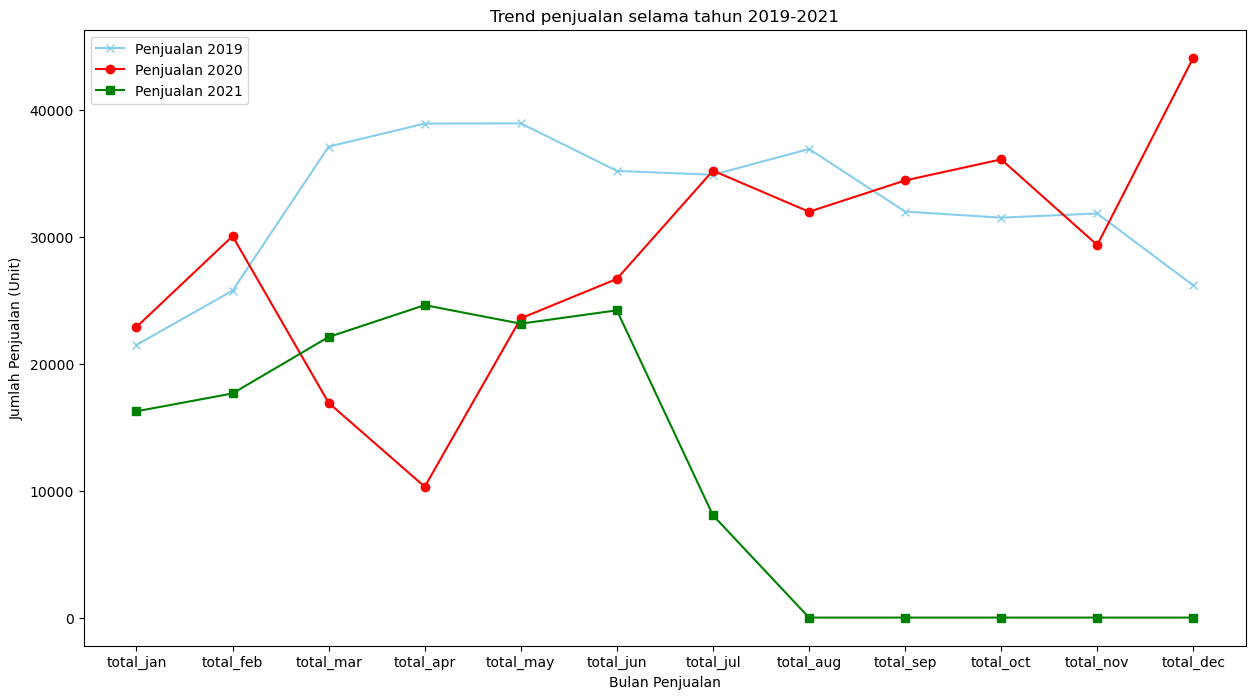

In [218]:
plt.figure(figsize=(15,8))

Ax = dftotal["Total Bulan"]
Ay1 = dftotal["Unit 2019"]
Ay2 = dftotal["Unit 2020"]
Ay3 = dftotal["Unit 2021"]

plt.plot(Ax,Ay1, label="Penjualan 2019",marker='x',color='skyblue')
plt.plot(Ax,Ay2, label="Penjualan 2020",marker='o',color='red')
plt.plot(Ax,Ay3, label="Penjualan 2021",marker='s',color='green')

plt.xlabel("Bulan Penjualan")
plt.ylabel("Jumlah Penjualan (Unit)")
plt.legend()
plt.title("Trend penjualan selama tahun 2019-2021")
plt.show()